Libraries that will be used to build the model, train and deal with the dataset must be import to be used

In [47]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

The dataset that will be used in the problem must be read, in order to do it the pandas library will be used to read the CSV file

In [48]:
#load data GPAM_Challenge dataset 
dataset = pd.read_csv('olist_order_reviews_dataset.csv') 

The dataset contains many rows without comments, and it needs to be treated it before using it to train the model, if not there will be "Trash" information that will not help to predict the product's rating based in blank comment.

In [49]:
#take the blank comments row out
dataset = dataset.dropna(subset=['review_comment_message'])

Print information of the datased. Such as it's shape, destribution, the first 10 rows and check about the rating distribution ( amount of 1, 2, 3, 4 and 5 stars) 

In [50]:
print(dataset.shape)
print(dataset.head(10))
print(dataset.describe())
print(dataset.groupby('review_score').size())

(41753, 7)
                           review_id                          order_id  \
3   e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4   f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9   8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12  4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15  3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
16  9314d6f9799f5bfba510cc7bcd468c01  0dacf04c5ad59fd5a0cc1faa07c34e39   
19  373cbeecea8286a2b66c97b1b157ec46  583174fbe37d3d5f0d6661be3aad1786   
22  d21bbc789670eab777d27372ab9094cc  4fc44d78867142c627497b60a7e0228a   
24  0e0190b9db53b689b285d3f3916f8441  79832b7cb59ac6f887088ffd686e1d5e   
27  fe3db7c069d694bab50cc43463f91608  2ca73e2ff9e3a186ad1e1ffb9b1d9c10   

    review_score     review_comment_title  \
3              5                      NaN   
4              5                      NaN   
9              4                recomen

An histogram is a good way to visualize the rating distribution. How many data there are in each class (1, 2, 3, 4, 5). As the data distribution is not uniform accuracy is not a very good metric to be used when we check the histogram.

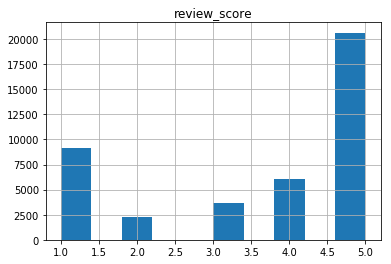

In [51]:
#check data distribution
dataset.hist()
plt.show()

Extract the values of the dataset to an array

In [52]:
array = dataset.values

Slice the comments value into a single array

In [54]:
# split comments column
X = array[:,4] 

The rating column will be split out of the dataset array and cast into int, just to be sure

In [55]:
#split rating column
Y = array[:,2]
Y = Y.astype(int)

The dataset has to be split into train and also test data. the proportion used is 30% to the test set and 70 to the training set

In [56]:
validation_size = 0.3

The dataset needs to have a seed to be used when splitting the data 5 was chosen randomly 

In [57]:
#random seed to split the dataset
seed = 5

The text needs to be vectorized in order to be better understood by machines, to do so a vectorized will be created and the comments (X) will fit it.


In [58]:
# Vectorizer to split text
vectorizer = TfidfVectorizer(ngram_range=(1,2))
x_vectorized = vectorizer.fit_transform(X)

Now the splitting of the dataset will be done between training set and validation set.
The vectorized dataset will be used the validation size will be used (30%) and the seed to split(5)

In [59]:
#split the datset between train and validation
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x_vectorized,
                                                Y,
                                                test_size=validation_size,
                                                random_state=seed)

Just to check the size of each dataset training and validation

In [60]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Test set has {} samples.".format(X_validation.shape[0]))

Training set has 29227 samples.
Test set has 12526 samples.


The models to train will be created and tested to check which one will have better metrics on the dataset 

In [61]:
#Linear Classifier
linearClassificer = LinearSVC()
linearClassificer.fit(X_train, Y_train)
linearPrediction = linearClassificer.predict(X_validation)

Check the linear classifier accuracy ( it is not the recommended metric, I've tried f1-score but I got some erros and I could solve them)

In [62]:
print("Accuracy")
print("LinearSVC:",accuracy_score(Y_validation,linearPrediction))

Accuracy
LinearSVC: 0.6828197349513013


In [65]:
#KNeighbors Classifier
classifierKNN = KNeighborsClassifier(n_neighbors=2)
classifierKNN.fit(X_train, Y_train)
predictionKNN = classifierKNN.predict(X_validation)


In [64]:
print("Accuracy KNN:", accuracy_score(Y_validation, predictionKNN))

Accuracy KNN: 0.3029698227686412


In [66]:
#MultinomialNB Classifier
multinomialClassifier = MultinomialNB()
multinomialClassifier.fit(X_train, Y_train)
predictionMUB = multinomialClassifier.predict(X_validation)

In [67]:
print("MultinomialNB:",accuracy_score(Y_validation, predictionMUB))

MultinomialNB: 0.6699664697429347


Once the highest accuracy comes from the Liner Classifier, it was chosen to be used 

A function the plot the confusion matrix of the classifier needs to be built

In [68]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.around((cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]),decimals=2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


create confusion matrix with the best model 

In [70]:
confusionMatrixLSVC = confusion_matrix(Y_validation, linearPrediction)

The plotted data will be able to be analysed

Confusion matrix, without normalization
[[2388   58   99   57  175]
 [ 469   32   53   47   83]
 [ 416   28  164  140  339]
 [ 155   17  110  235 1285]
 [ 139    3   66  234 5734]]


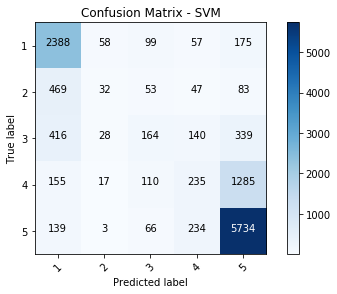

In [71]:
classes = ['1', '2', '3', '4', '5']
plt.figure()

plot_confusion_matrix(confusionMatrixLSVC,
                      classes,
                      normalize=False,
                      title='Confusion Matrix - SVM')
plt.show()

As the confusion matrix picture shows, the main diagonal shows the amount of correct predicted values the  other values are the values that were wrongly predicted
